In [12]:
### Plot inline
%matplotlib inline
#'exec(%matplotlib inline)'
# Increase plotting resolution to vector format
%config InlineBackend.figure_format = 'svg'

from matplotlib.font_manager import FontProperties
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

import numpy as np
from IPython import display
import matplotlib.gridspec as gridspec
import sys

import math as math
import datetime
from datetime import timedelta
import matplotlib.dates as mdates
import matplotlib.ticker
from matplotlib.ticker import FormatStrFormatter
import os
import glob
print (sys.path)
import pandas as pd
#import seaborn as sns
import matplotlib.dates as dates
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter, YearLocator
from magnetometer_utils import *
from model_utils import *
import netCDF4

['/usr/bin/python', '/home/juanpablo/.local/bin', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '', '/home/juanpablo/.local/lib/python3.6/site-packages', '/usr/local/lib/python3.6/dist-packages', '/usr/local/lib/python3.6/dist-packages/sami2py-0.2.2-py3.6.egg', '/usr/local/lib/python3.6/dist-packages/matplotlib-3.3.3-py3.6-linux-x86_64.egg', '/usr/local/lib/python3.6/dist-packages/xarray-0.16.2-py3.6.egg', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/home/juanpablo/.ipython']


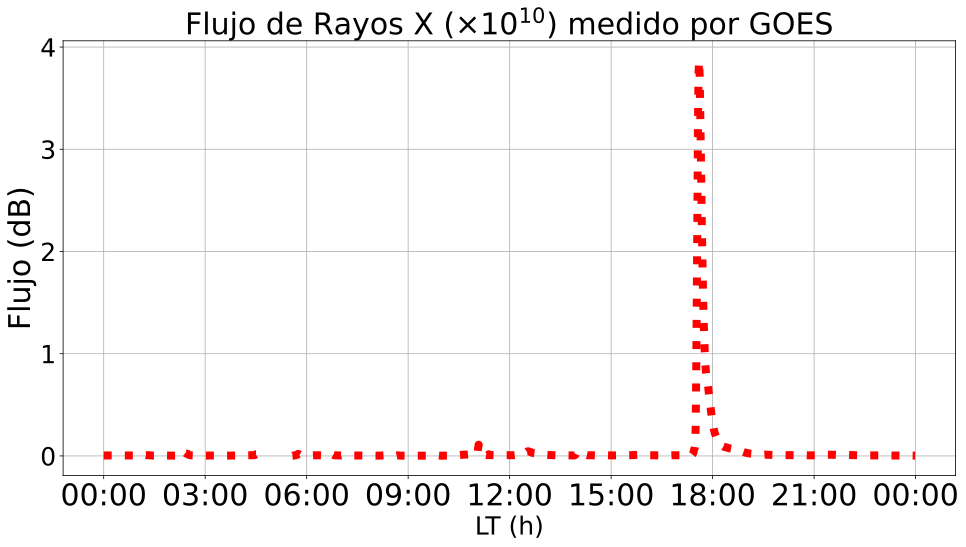

In [13]:
nc_file = '/home/juanpablo/Desktop-JRO/Magnetometer/dn_xrsf-l2-avg1m_g16_d20220330_v2-1-0.nc'

#dn_xrsf-l2-fldet_g17_d20211028_v2-1-0.nc
nc = netCDF4.Dataset(nc_file, mode='r')
#print(nc)
xrsa_flux = nc.variables['xrsa_flux'][:]
xrsa_flux_observed = nc.variables['xrsa_flux_observed'][:]
xrsb_flux = nc.variables['xrsb_flux'][:]
time_var = nc.variables['time']
dtime = netCDF4.num2date(time_var[:],time_var.units)

datetime_index = []
for dt in dtime:
    #print(dt.year,dt.month,dt.day, dt.hour,dt.minute)#,0)
    dt_temp = datetime.datetime(dt.year,dt.month,dt.day,dt.hour,dt.minute)
    datetime_index.append(dt_temp)
#xrs_a_series = pd.Series(10*numpy.log10(xrsa_flux_observed*1e7), index=pd.to_datetime(datetime_index)-pd.Timedelta(hours=0)) 
xrs_a_series = pd.Series(xrsa_flux_observed*1e5, index=pd.to_datetime(datetime_index)-pd.Timedelta(hours=0)) 

import matplotlib as mpl
#mpl.rcParams['timezone'] = 'America/Lima'
#mpl.use('Agg')
import matplotlib.pyplot as plt
fig3, ax3 = plt.subplots(figsize=(16,8))
#for i in range(len(stations)):
#    h_avg_list[i].plot(yerr=h_std_list[i],label=stations[i])
plt.rcParams['ytick.labelsize']=25
plt.rcParams['xtick.labelsize']=30
ax3.set_xlabel('LT (h)', fontsize=25)

ax3.set_ylabel('Flujo (dB)', fontsize=30)

#print(xrs_a_series.loc["2020-11-08T 07:00:00":"2020-11-08 16:00:00"][:])
#ax3.set_title('Componente Horizontal del Campo Geomagnético H - Media (nT)', fontsize=25)
#ax.plot(f_min_IRI.loc["2020-09-04T 00:00:00":"2020-09-30T 23:55:00"], label='Min. IRI',linestyle=':', color='red',linewidth=8)

#ax3.plot(xrs_a_series.loc["2022-03-30T 17:00:00":"2022-03-30T 23:59:00"], label=r'Flujo de Rayos X $(\times 10^5)$',linestyle=':', color='red',linewidth=8)
ax3.plot(xrs_a_series.loc["2022-03-30T 00:00:00":"2022-03-30T 23:59:00"], label=r'Flujo de Rayos X $(\times 10^5)$',linestyle=':', color='red',linewidth=8)


#ax3 = xrs_a_series.plot(label=r'Flujo de Rayos X $(\times 10^5)$')
#print(xrs_a_series.loc["2022-03-30T 00:00:00":"2022-03-30T 23:59:00"])
a=xrs_a_series.loc["2022-03-30T 00:00:00":"2022-03-30T 23:59:00"]

#ax3.set_xlim("2021-10-28 14:30:00","2021-10-28 20:30:00")
#ax3.set_xlim(pd.Timestamp('2020-11-08T 07:00:00'), pd.Timestamp('2020-11-08T 16:00:00'))
plt.title(r'Flujo de Rayos X $(\times 10^{10})$ medido por GOES', fontsize=30)
#plt.plot(daily_averages, color=colors[i], label=stations[i])
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
#ax3.tick_params(axis='y', labelsize=25)
#ax3.tick_params(axis='x', labelsize=30)
#ax3.xaxis.set_major_locator(plt.MaxNLocator(5))
#ax1.tick_params(axis='y', labelcolor=sorted_names[0],labelsize=20)
#ax1.tick_params(axis='x',labelsize=20)
plt.grid(True)
plt.savefig('flujo-rayos-x-llamarada-solar-30-marzo.png')

Punto 1
Punto 2
Punto 3
Punto 4
Punto 5


'\n\nprint("Punto 7")\n\n\n#fontsize = 11\nax2.set_xlabel(\'UT (h)\', fontsize=fontsize)\nax2.set_ylabel(\'H (nT) \', fontsize=fontsize)\n#ax2.xaxis.set_tick_params(labelsize=fontsize)\nprint("Punto 8")\nax2.yaxis.set_tick_params(labelsize=fontsize)\n#ax2.legend([\'_Hidden label\',\'_Hidden label\',\'Piura\',\'Jicamarca\',\'Huancayo\', \'Nazca\', \'Arequipa\'],fontsize=fontsize)\nstr_save2 = \'%s/solar-flare-no-offset-H-%s.pdf\' % (dir_plots,str_date)\n#dti = datetime.datetime(2022, 3, 30, 0, 0, 0)\n#dtf = datetime.datetime(2022, 3, 30, 0, 0, 0)\n#ax2.set_xlim(dti,dtf)\n#ax2.grid(True, which=\'both\')\n#plt.setp( ax2.xaxis.get_majorticklabels(), rotation=0 ,ha=\'center\')\n\n#plt.savefig(str_save2,bbox_inches="tight")\n    #ax1.set_ylabel(\'Media H (nT) \', color=colors[i], fontsize=25)\n#plt.close()\n'

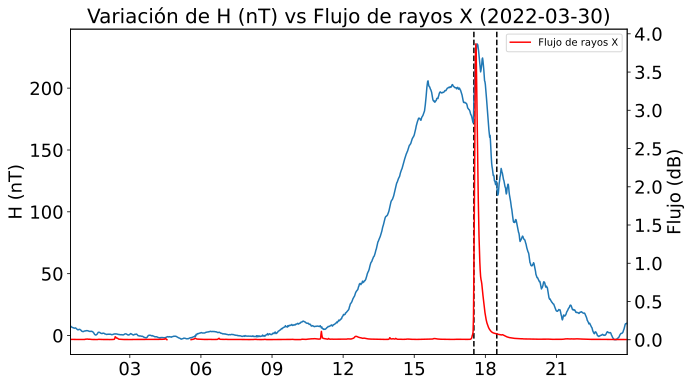

In [14]:
#filename = 'jica_2008_month.min'
year = 2022
month = 3
#day = 1
str_month = GetMonth(month)
current_month =  '%s-%d' % (str_month,year)
dir_data = '%s-Data/Solar-Flare-Data' % current_month 
dir_plots = 'Solar-Flare-Plots' 
#dir_data = 'Tonga'#'%s-Data' % current_month
time1 = datetime.datetime(2022, 3, 30, 3, 0, 0) #- pd.Timedelta(hours=5)
time2 = datetime.datetime(2022, 3, 30, 7, 0, 0) #- pd.Timedelta(hours=5)
str_date = '2022-03-30'
huancayo_file = dir_data+ os.sep + 'huan_220330.min'
roj_file = dir_data + os.sep + 'jica_220330.min'
nazca_file = dir_data + os.sep + 'nazc_220330.min'
tara_file = dir_data + os.sep + 'tara_220330.min'
magData_roj = pd.read_csv(roj_file,delimiter=r"\s+", skiprows=2,usecols= ["DD","MM","YYYY", "hh", "mm", "H(nT)","Z(nT)"])
magData_huancayo = pd.read_csv(huancayo_file,delimiter=r"\s+", skiprows=2,usecols= ["DD","MM","YYYY", "hh", "mm", "H(nT)","Z(nT)"])
magData_nazca = pd.read_csv(nazca_file,delimiter=r"\s+", skiprows=2,usecols= ["DD","MM","YYYY", "hh", "mm", "H(nT)","Z(nT)"])
magData_tara = pd.read_csv(tara_file,delimiter=r"\s+", skiprows=2,usecols= ["DD","MM","YYYY", "hh", "mm", "H(nT)","Z(nT)"])

h_field_roj = GetTimesSeriesH(magData_roj)
h_field_huancayo = GetTimesSeriesH(magData_huancayo)
h_field_nazca = GetTimesSeriesH(magData_nazca)
h_field_tara = GetTimesSeriesH(magData_tara)
print("Punto 1")
baseline_roj = h_field_roj[time1:time2].mean()
baseline_huancayo = h_field_huancayo[time1:time2].mean()
baseline_nazca = h_field_nazca[time1:time2].mean()
baseline_tara = h_field_tara[time1:time2].mean()
print("Punto 2")
h_field_sub_roj = h_field_roj - baseline_roj
h_field_sub_huancayo = h_field_huancayo - baseline_huancayo
h_field_sub_nazca = h_field_nazca - baseline_nazca
h_field_sub_tara = h_field_tara - baseline_tara
print("Punto 3")
fontsize = 18
#'''
#fig2, ax2 = plt.subplots(figsize=(16,8))
fig2, ax2 = plt.subplots(1,1,figsize=(10,6))
#ax3=fig2.add_subplot(111, label="2", frame_on=False)
print("Punto 4")
ax2.xaxis_date()
print("Punto 5")
dt1 = datetime.datetime(2022, 3, 30, 17, 31, 0)
dt2 = datetime.datetime(2022, 3, 30, 18, 29, 0)
#dt2 = datetime.datetime(2022, 1, 15, 16, 0, 0)
ax2.axvline(dt1,linestyle='--',color='black')#,linewidth=4, color='w')
ax2.axvline(dt2,linestyle='--',color='black')
ax2.plt = ax2.plot(h_field_sub_roj.index,h_field_sub_roj.values,label='H')
date_format = mdates.DateFormatter('%H')
ax2.xaxis.set_major_formatter(date_format)
ax2.set_ylabel('H (nT)',fontsize=18)
ax2.tick_params(axis='x', labelsize=18)
ax2.tick_params(axis='y', labelsize=18)
ax2.set_title(r'Variación de H (nT) vs Flujo de rayos X (%s)' % str_date, fontsize=20)
dti = datetime.datetime(2022,3,30,0,30)
dtf = datetime.datetime(2022,3,30,23,59)
ax2.set_xlim(dti,dtf)
ax3 = ax2.twinx()
plt.ax3=ax3.plot(xrs_a_series.loc["2022-03-30T 00:00:00":"2022-03-30T 23:59:00"].index,xrs_a_series.loc["2022-03-30T 00:00:00":"2022-03-30T 23:59:00"].values,color='red',label='Flujo de rayos X')#,linestyle= 'dashed')
ax3.xaxis_date()
date_format = mdates.DateFormatter('%H')
ax3.xaxis.set_major_formatter(date_format)
ax3.set_xlim(dti,dtf)
ax3.tick_params(axis='x', labelsize=18)
ax3.tick_params(axis='y', labelsize=18)
ax3.set_ylabel('Flujo (dB)',fontsize=18)
ax3.get_xaxis().set_visible(False)
ax3.yaxis.tick_right()

#ax3.plot(xrs_a_series.loc["2022-03-30T 00:00:00":"2022-03-30T 23:59:00"], label=r'Flujo de Rayos X $(\times 10^5)$',linestyle=':', color='red',linewidth=8)
plt.legend()
plt.savefig('H-vs-X-rays-flux-2022-03-30.png',bbox_inches="tight")
'''

print("Punto 7")


#fontsize = 11
ax2.set_xlabel('UT (h)', fontsize=fontsize)
ax2.set_ylabel('H (nT) ', fontsize=fontsize)
#ax2.xaxis.set_tick_params(labelsize=fontsize)
print("Punto 8")
ax2.yaxis.set_tick_params(labelsize=fontsize)
#ax2.legend(['_Hidden label','_Hidden label','Piura','Jicamarca','Huancayo', 'Nazca', 'Arequipa'],fontsize=fontsize)
str_save2 = '%s/solar-flare-no-offset-H-%s.pdf' % (dir_plots,str_date)
#dti = datetime.datetime(2022, 3, 30, 0, 0, 0)
#dtf = datetime.datetime(2022, 3, 30, 0, 0, 0)
#ax2.set_xlim(dti,dtf)
#ax2.grid(True, which='both')
#plt.setp( ax2.xaxis.get_majorticklabels(), rotation=0 ,ha='center')

#plt.savefig(str_save2,bbox_inches="tight")
    #ax1.set_ylabel('Media H (nT) ', color=colors[i], fontsize=25)
#plt.close()
'''

Punto 4
Punto 5
Maximum value:  119.73360995850453


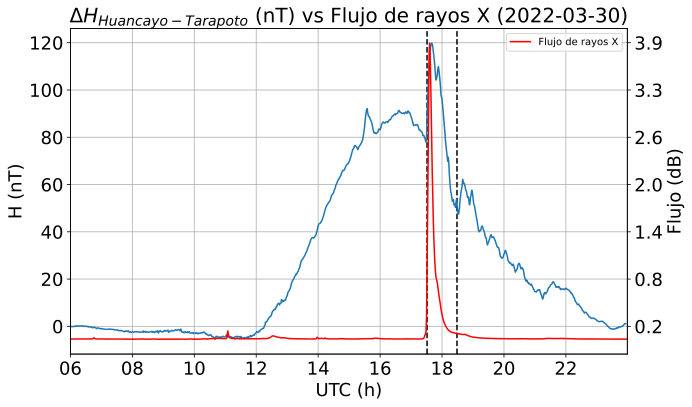

In [19]:
#deltaH = h_field_sub_roj - h_field_sub_tara
deltaH = h_field_sub_huancayo - h_field_sub_tara
fig2, ax2 = plt.subplots(1,1,figsize=(10,6))
#ax3=fig2.add_subplot(111, label="2", frame_on=False)
print("Punto 4")
ax2.xaxis_date()
print("Punto 5")
dt1 = datetime.datetime(2022, 3, 30, 17, 31, 0)
dt2 = datetime.datetime(2022, 3, 30, 18, 29, 0)
#dt2 = datetime.datetime(2022, 1, 15, 16, 0, 0)
ax2.axvline(dt1,linestyle='--',color='black')#,linewidth=4, color='w')
ax2.axvline(dt2,linestyle='--',color='black')
#ax2.plt = ax2.plot(deltaH.index,deltaH.values,label='H')
ax2.plot(deltaH.index,deltaH.values,label='H')
date_format = mdates.DateFormatter('%H')
ax2.xaxis.set_major_formatter(date_format)
ax2.set_ylabel('H (nT)',fontsize=18)
ax2.set_xlabel('UTC (h)',fontsize=18)
ax2.tick_params(axis='x', labelsize=18)
ax2.tick_params(axis='y', labelsize=18)
ax2.set_title(r'$\Delta H_{Huancayo-Tarapoto}$ (nT) vs Flujo de rayos X (%s)' % str_date, fontsize=20)
dti = datetime.datetime(2022,3,30,6,0)
dtf = datetime.datetime(2022,3,30,23,59)
ax2.set_xlim(dti,dtf)
#ax2.set_ylim(-5,np.max(deltaH.values))
ax3 = ax2.twinx()
#plt.ax3=ax3.plot(xrs_a_series.loc["2022-03-30T 00:00:00":"2022-03-30T 23:59:00"].index,xrs_a_series.loc["2022-03-30T 00:00:00":"2022-03-30T 23:59:00"].values,color='red',label='Flujo de rayos X')#,linestyle= 'dashed')
ax3.plot(xrs_a_series.loc["2022-03-30T 00:00:00":"2022-03-30T 23:59:00"].index,xrs_a_series.loc["2022-03-30T 00:00:00":"2022-03-30T 23:59:00"].values,color='red',label='Flujo de rayos X')#,linestyle= 'dashed')
ax3.xaxis_date()
date_format = mdates.DateFormatter('%H')
ax3.xaxis.set_major_formatter(date_format)
ax3.set_xlim(dti,dtf)
ax3.tick_params(axis='x', labelsize=18)
ax3.tick_params(axis='y', labelsize=18)
ax3.set_ylabel('Flujo (dB)',fontsize=18)

ax3.get_xaxis().set_visible(False)
ax3.yaxis.tick_right()
#ax3.grid(axis='both', which='both')
#ax3.grid(which='major', axis='both')
#ax = plt.gca()
#ax.grid(which='major', axis='both', linestyle='-')
print('Maximum value: ', np.max(deltaH))
#ax3.plot(xrs_a_series.loc["2022-03-30T 00:00:00":"2022-03-30T 23:59:00"], label=r'Flujo de Rayos X $(\times 10^5)$',linestyle=':', color='red',linewidth=8)
ax2.grid()
plt.legend(loc='upper right')
#plt.grid(True)#, which='both')
l = ax2.get_ylim()
l2 = ax3.get_ylim()
f = lambda x : l2[0]+(x-l[0])/(l[1]-l[0])*(l2[1]-l2[0])
ticks = f(ax2.get_yticks())
ax3.yaxis.set_major_locator(matplotlib.ticker.FixedLocator(ticks))
ax3.yaxis.set_major_formatter(FormatStrFormatter('%.1f')) 
#plt.savefig('deltaH-roj-tarapoto-vs-X-rays-flux-2022-03-30.png',bbox_inches="tight")
plt.savefig('deltaH-huancayo-tarapoto-vs-X-rays-flux-2022-03-30.png',bbox_inches="tight")